# CIFAR-10: CNN from scratch

#### Imports

In [1]:
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from keras import Model
from keras.models import Sequential

from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import AdamW, RMSprop

2025-06-10 16:37:13.073196: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 16:37:13.203507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749573433.255673   27125 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749573433.292327   27125 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749573433.445589   27125 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

#### Loading & Pre-processing Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

#### CNN Training Setup

In [11]:
inputs = tf.keras.Input(shape=(32, 32, 3))

# Block 1
x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 2
x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 3
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Classifier
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.45)(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = Model(inputs, outputs)

In [12]:
optimizer = AdamW(learning_rate=0.0005)

model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)

early_stop = EarlyStopping(
    patience=3,
    restore_best_weights=True,
    monitor="val_accuracy",
    min_delta=0.001,
)

#### Training the Model

In [13]:
history = model.fit(
    train_images,
    train_labels,
    validation_split=0.2,
    epochs=25,
    batch_size=128,
    callbacks=[lr_scheduler, early_stop],
    verbose=1,
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.3052 - loss: 2.3492 - val_accuracy: 0.0980 - val_loss: 10.9174 - learning_rate: 5.0000e-04
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4974 - loss: 1.4667 - val_accuracy: 0.3685 - val_loss: 2.0263 - learning_rate: 5.0000e-04
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5883 - loss: 1.1761 - val_accuracy: 0.6414 - val_loss: 1.0185 - learning_rate: 5.0000e-04
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6450 - loss: 1.0030 - val_accuracy: 0.6199 - val_loss: 1.1613 - learning_rate: 5.0000e-04
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6783 - loss: 0.9086 - val_accuracy: 0.6862 - val_loss: 0.8966 - learning_rate: 5.0000e-04
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7102 - loss: 0.8285 - val_accuracy: 0.7210 - val_loss: 0.7774 - learning_rate: 5.0000e-04
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - a

#### Accuracy & Graph

In [14]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f"CNN Test Accuracy: {test_acc:.4f}")

CNN Test Accuracy: 0.8110


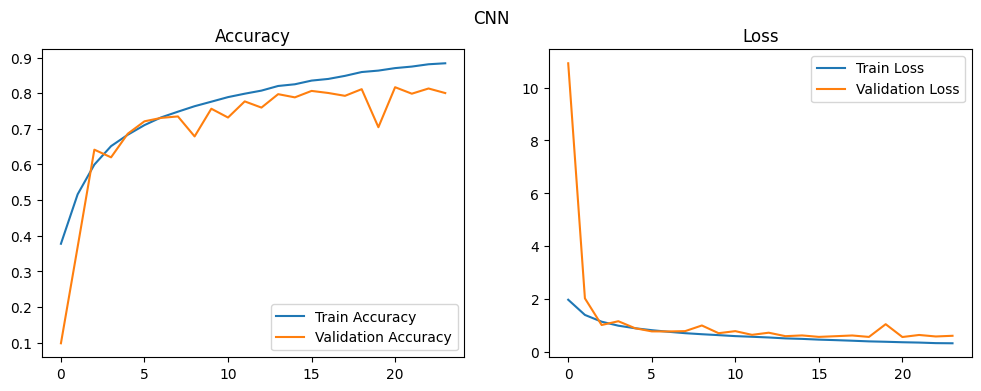

In [15]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history, "CNN")

### Test Accuracy: 0.8110

# CIFAR-10: Fine-tuning ResNet50 using Transfer Learning

#### Loading & Pre-processing Data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train data shape:", x_train.shape) 
print("Test data shape:", x_test.shape)

Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


#### Training / Transfer Learning Setup

In [ ]:
base_model = ResNet50(
    include_top=False, weights="imagenet"
)

# We freeze all but the last layers, so only the last layer's weights are trainable
for layer in base_model.layers[:143]:
    layer.trainable = False

In [ ]:
model = Sequential(
    [
        layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),
        base_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer=RMSprop(0.00002), loss="categorical_crossentropy", metrics=["accuracy"])

lr_schedule = (
    ReduceLROnPlateau(
        patience=1, factor=0.5, min_lr=1e-6, monitor="val_accuracy", verbose=1
    ),
)

es = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True
)

#### Fine-tuning the Model

In [31]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    callbacks=[es, lr_schedule],
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 112ms/step - accuracy: 0.2642 - loss: 2.2143 - val_accuracy: 0.8551 - val_loss: 0.7520 - learning_rate: 2.0000e-05
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 105ms/step - accuracy: 0.5760 - loss: 1.3041 - val_accuracy: 0.8993 - val_loss: 0.5303 - learning_rate: 2.0000e-05
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 105ms/step - accuracy: 0.7013 - loss: 0.9996 - val_accuracy: 0.9212 - val_loss: 0.3765 - learning_rate: 2.0000e-05
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 105ms/step - accuracy: 0.7853 - loss: 0.8025 - val_accuracy: 0.9313 - val_loss: 0.3142 - learning_rate: 2.0000e-05
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 105ms/step - accuracy: 0.8394 - loss: 0.6503 - val_accuracy: 0.9369 - val_loss: 0.2621 - learning_rate: 2.0000e-05
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 104ms/step - accuracy: 0.8792 - loss: 0.5246 - val_accuracy: 0.9415 - val_loss: 0.2353 - learning_rate: 2.0000e-05
Epoch 7/10
1250/1250 ━━━━━━━

#### Accuracy & Graph


Final Test Accuracy: 0.9460


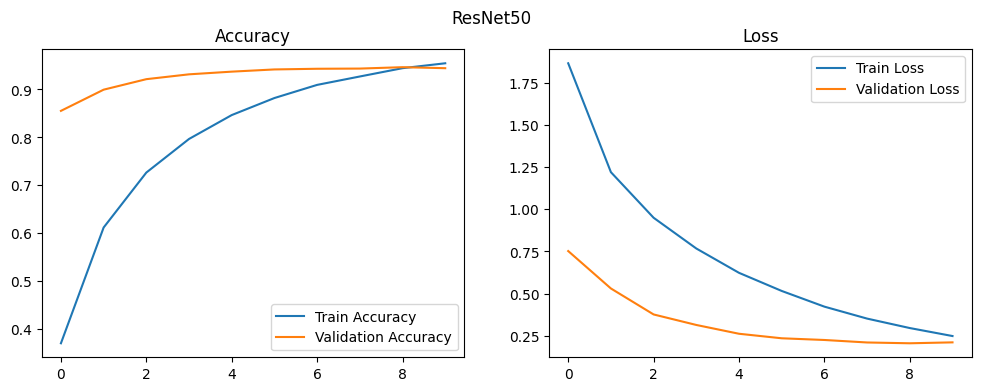

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()


plot_history(history, "ResNet50")

### Test Accuracy: 0.9460

# Performance Analysis

| Metric                 | Custom CNN (Model 1) | ResNet50 (Model 2)  |
| ---------------------- | -------------------- | ------------------- |
| **Final Val Accuracy** | 80.03%               | 94.41%              |
| **Test Accuracy**      | 81.10%               | 94.60%              |
| **Training Accuracy**  | 88.42%               | 95.52%              |
| **Val Loss**           | 0.6105               | 0.2112              |
| **Overfitting Gap**    | 8.39% (88.42-80.03)  | 1.11% (95.52-94.41) |

### Training Setup

| Component             | Custom CNN (Model 1)                      | ResNet50 (Model 2)                         |
| --------------------- | ----------------------------------------- | ------------------------------------------ |
| **Input Resolution**  | 32×32 (native CIFAR-10)                   | Upscaled to 224×224                        |
| **Base Architecture** | 3 Conv Blocks (64→128→256 filters)        | Pretrained ResNet50 (ImageNet weights)     |
| **Trainable Layers**  | All layers trainable                      | Last layer of ResNet50 + (256→128→64 Dense layers)           |
| **Activation**        | ReLU                                      | ReLU                                       |
| **Regularization**    | Dropout (0.25-0.45) + BatchNorm           | Dropout (0.5) + BatchNorm                  |
| **Optimizer**         | AdamW (Initial LR=0.0005)                  | AdamW (Initial LR=0.0001)                   |
| **LR Schedule**       | ReduceLROnPlateau (factor=0.5, patience=3) | ReduceLROnPlateau (factor=0.5, patience=1) |
| **Early Stopping**    | Yes (patience=3, monitor val_accuracy)    | Yes (patience=2, monitor val_accuracy)     |
| **Batch Size**        | 128                                       | 32                                         |
| **Epochs**            | 25                                        | 10                 |

### Observations

##### 1. Accuracy Performance
- **ResNet50 dominates** across all accuracy metrics (train/val/test)
- Achieves **94.6% test accuracy** vs CNN's 81.1%

##### 2. Training Dynamics
- **CNN Pros**:
    - Faster training (4s vs 131s per epoch)
    - Simpler architecture
        
- ResNet50 Pros:
    - Better convergence (smoother learning curves)
    - Higher final accuracy
    - Minimal overfitting (just 1.11% gap vs CNN's 8.39%)

##### 3. Loss Characteristics
- **ResNet50** shows more stable validation loss (0.2112 vs CNN's 0.6105)
- CNN's higher validation loss suggests:
    - Less generalizable features
    - Potential need for stronger regularization